# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [7]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'
traffic_sign_name_file = './signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(traffic_sign_name_file) as f:
    f.readline() # Strip the header
    items = [line.strip().split(',') for line in f]
    traffic_sign_names = {int(t[0]): t[1] for t in items}
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
assert(len(X_train == len(y_train)))
assert(len(X_valid == len(y_valid)))
assert(len(X_test == len(y_test)))

n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

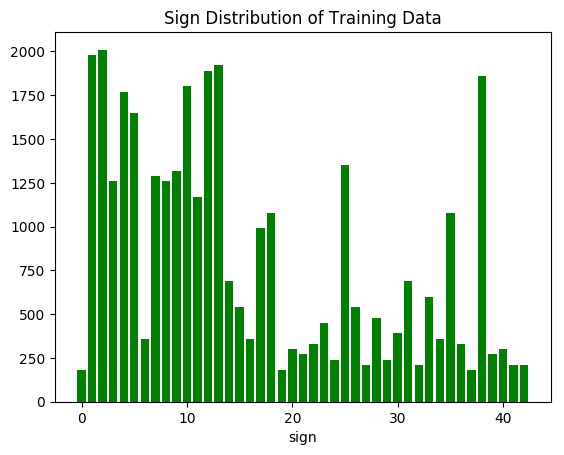

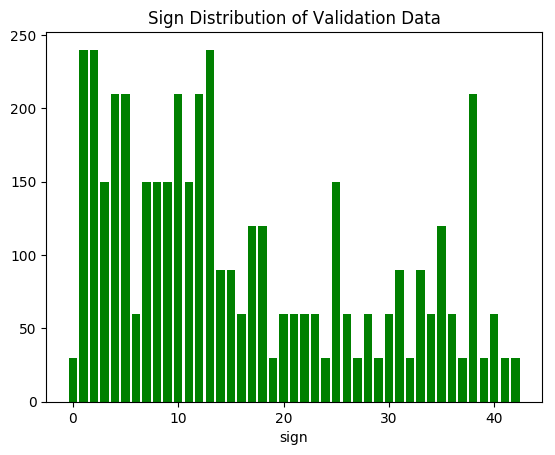

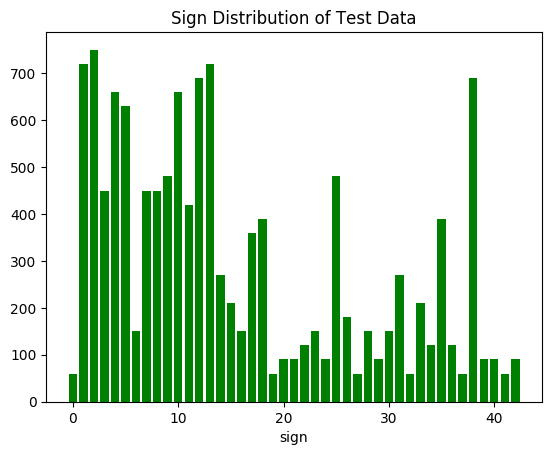

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import itertools
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def analysis_y_data(y_data):
    y_analysis_count = []
    y_analysis_key = []
    for k, g in itertools.groupby(sorted(y_data)):
        y_analysis_count.append(len(list(g)))
        y_analysis_key.append(k)
        
    y_train_analysis = {
            'key': y_analysis_key,
            'count': y_analysis_count}
    
    return y_train_analysis

for data, source in [[y_train, 'Training'], [y_valid, 'Validation'], [y_test, 'Test']]:
    data_analysis = analysis_y_data(data)
    plt.rcdefaults()
    plt.bar(data_analysis['key'], data_analysis['count'], align='center',
        color='green')
    plt.title('Sign Distribution of %s Data'%source)
    plt.xlabel('sign')
    plt.show()


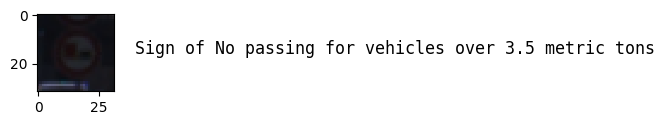

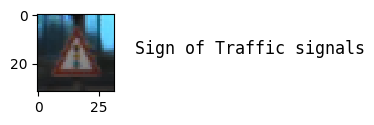

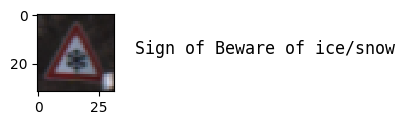

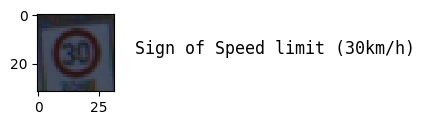

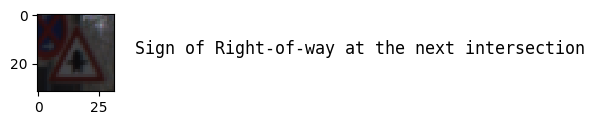

In [10]:
num_to_select = 5
for item in random.sample(range(len(X_train)), num_to_select):
    image = X_train[item].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    annotation = 'Sign of %s'%traffic_sign_names[y_train[item]]
    plt.annotate(annotation,xy=(0,0), xytext=(40,16), fontsize=12, family='monospace')
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np

def image_normalize(x):
    original_image = np.array(x, dtype=np.float32)
    for n in range(len(original_image)):
        #for the R, G, B channel respectively
        for i in range(3):
            maxPixel = np.amax(original_image[n][...,i])
            minPixel = np.amin(original_image[n][...,i])
            original_image[n][...,i] = -1.0 + (original_image[n][...,i] - minPixel)*2.0/(maxPixel-minPixel)
    return original_image

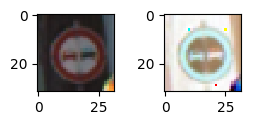

In [12]:
### After normalized, the image becomes -1 ~ +1 value array
### Such array needs transformation back to 0 ~ 255 pixel data,
### in order to be compared with the original image
demo_original = X_train[random.sample(range(len(X_train)), 1)]
normalized_array = image_normalize(demo_original)
normalized_array = (normalized_array+1.0)*255/2
demo_normalized = np.array(normalized_array, dtype=np.int8)
plt.figure(figsize=(3,1))
plt.subplot(1,2,1)
image = demo_original.squeeze()
#plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

plt.subplot(1,2,2)
image = demo_normalized.squeeze()
#plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.show()

In [13]:
X_train = image_normalize(X_train)
X_valid = image_normalize(X_valid)
X_test = image_normalize(X_test)

### Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [15]:
# Setup the parameters for tensorflow
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [16]:
# Define the main architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 18), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(18))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    #conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.sigmoid(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x18. Output = 14x14x18.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x48.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    #conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.sigmoid(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x48. Output = 5x5x48.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x48. Output = 1200.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1200. Output = 360.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 360), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(360))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    #fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.sigmoid(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 360. Output = 252.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(360, 252), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(252))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    #fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.sigmoid(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 252. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(252, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

saver = tf.train.Saver()

In [13]:
#saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './ts_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.707
Validation Accuracy = 0.654

EPOCH 2 ...
Training Accuracy = 0.919
Validation Accuracy = 0.865

EPOCH 3 ...
Training Accuracy = 0.969
Validation Accuracy = 0.926

EPOCH 4 ...
Training Accuracy = 0.983
Validation Accuracy = 0.948

EPOCH 5 ...
Training Accuracy = 0.990
Validation Accuracy = 0.956

EPOCH 6 ...
Training Accuracy = 0.994
Validation Accuracy = 0.954

EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.958

EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.957

EPOCH 9 ...
Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.955

EPOCH 11 ...
Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 12 ...
Training Accuracy = 1.000
Validation Accuracy = 0.966

EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.959

EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.957

EPOCH 15 ...
Training Accuracy = 1.000
Valid

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

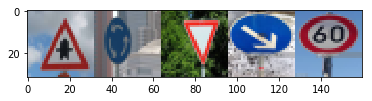

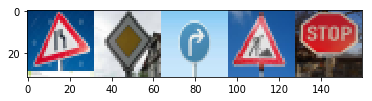

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

path = "test_data/"

X_newTest = []
y_newTest = []

for item in os.listdir(path):
    image = mpimg.imread(path+item)
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    X_newTest.append(image)
    num, ext = os.path.splitext(item)
    y_newTest.append(int(num))

vis = np.concatenate(X_newTest[0:5], axis=1)
plt.imshow(vis)
plt.show()
vis = np.concatenate(X_newTest[5:], axis=1)
plt.imshow(vis)
plt.show()

### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def image_possibility(X_data):
    sess = tf.get_default_session()
    possibility = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data})
    return possibility

all_possibility = tf.placeholder(tf.float32, [None, 43])
find_max_possibility = tf.argmax(all_possibility, 1)
def predict_image(possibility):
    sess = tf.get_default_session()
    result = sess.run(find_max_possibility, feed_dict={all_possibility: possibility})
    return result


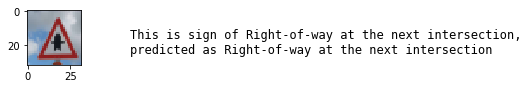

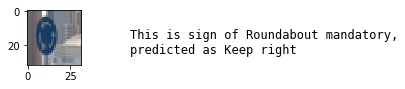

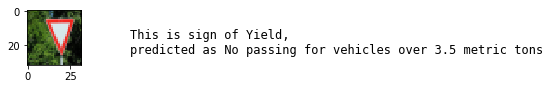

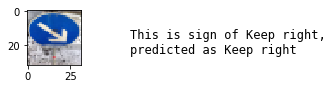

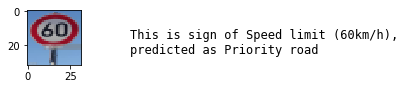

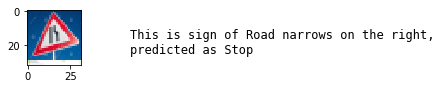

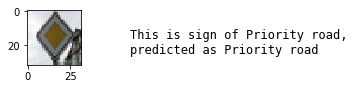

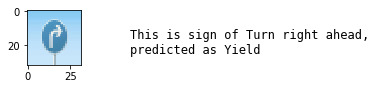

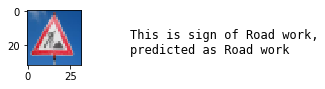

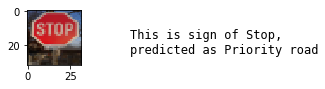

In [24]:
X_newTest_normalized = image_normalize(X_newTest)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    p = image_possibility(X_newTest_normalized)
    test_result = predict_image(p)
    correct = tf.equal(test_result, y_newTest)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    for index, predict in enumerate(test_result):
        fig = plt.figure(figsize=(1,1))
        plt.imshow(X_newTest[index])
        annotation = "This is sign of %s,\npredicted as %s" %(traffic_sign_names[y_newTest[index]], traffic_sign_names[predict])
        plt.annotate(annotation,xy=(0,0), xytext=(60,25), fontsize=12, family='monospace')
        plt.show()

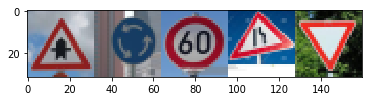

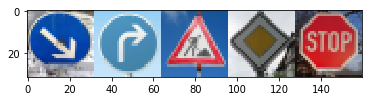

In [35]:
### The images in the "test_data_new" directory are manually clipped to 1:1 ratio
### from those the model did not classify correctly,
### in order to eliminate the distortion caused by downscaling dispropotionately

path = "test_data_new/"

X_newTest = []
y_newTest = []

for item in os.listdir(path):
    image = mpimg.imread(path+item)
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    X_newTest.append(image)
    num, ext = os.path.splitext(item)
    y_newTest.append(int(num))

vis = np.concatenate(X_newTest[0:5], axis=1)
plt.imshow(vis)
plt.show()
vis = np.concatenate(X_newTest[5:], axis=1)
plt.imshow(vis)
plt.show()

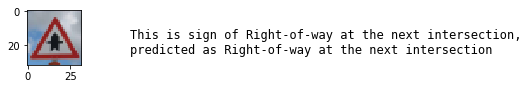

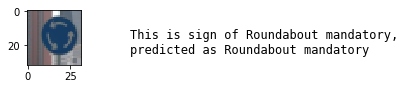

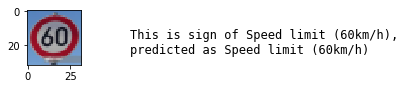

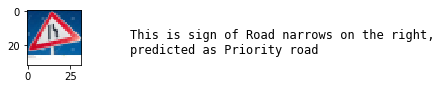

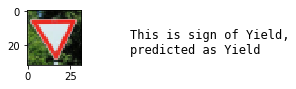

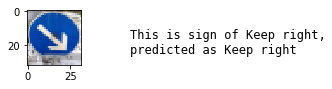

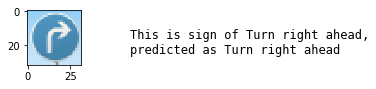

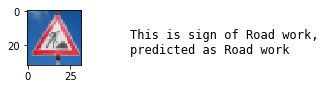

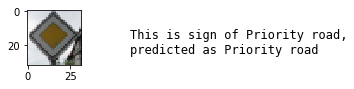

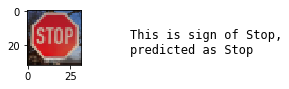

In [36]:
X_newTest_normalized = image_normalize(X_newTest)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    p = image_possibility(X_newTest_normalized)
    test_result = predict_image(p)
    correct = tf.equal(test_result, y_newTest)
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    for index, predict in enumerate(test_result):
        fig = plt.figure(figsize=(1,1))
        plt.imshow(X_newTest[index])
        annotation = "This is sign of %s,\npredicted as %s" %(traffic_sign_names[y_newTest[index]], traffic_sign_names[predict])
        plt.annotate(annotation,xy=(0,0), xytext=(60,25), fontsize=12, family='monospace')
        plt.show()

### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
result = tf.placeholder(tf.int32, (None))
answer = tf.placeholder(tf.int32, (None))
correct = tf.equal(result, answer)
#print(correct)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
#print(accuracy)
with tf.Session() as sess:
    #sess.run(correct, feed_dict={result: test_result, answer: y_newTest})
    test_accuracy = sess.run(accuracy, feed_dict={result: test_result, answer: y_newTest})
    print('This model has {}% accurate on these new images'.format(round(test_accuracy * 100), 2))

This model has 90.0% accurate on these new images


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

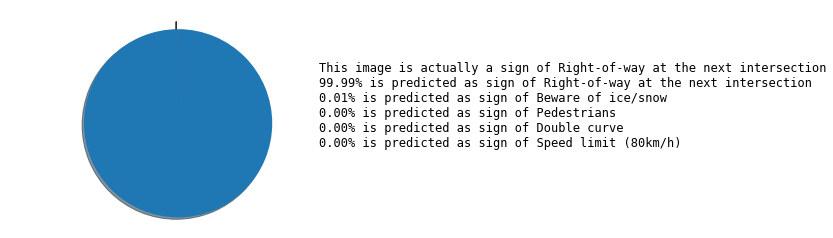

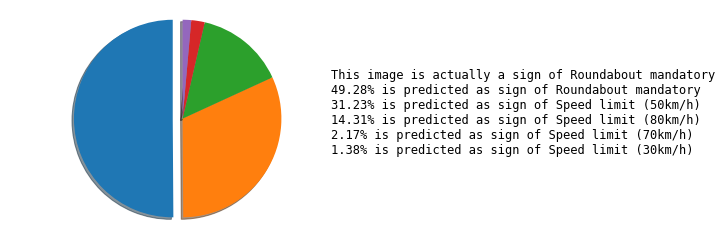

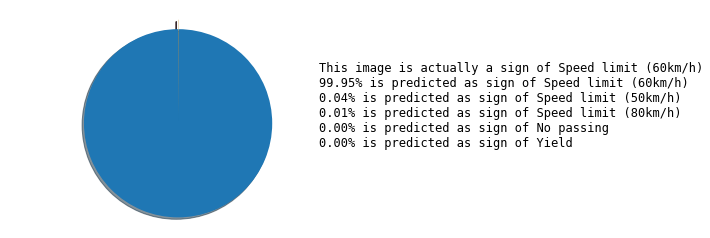

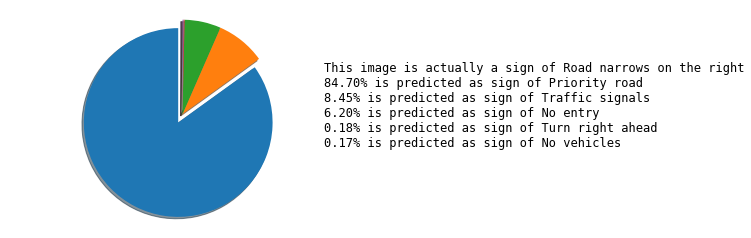

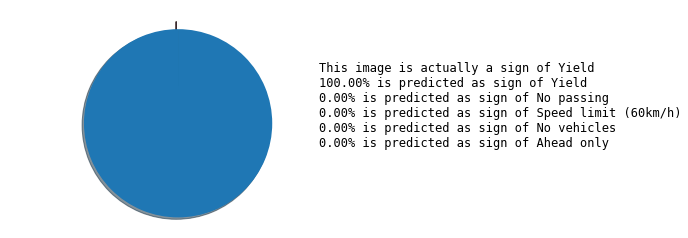

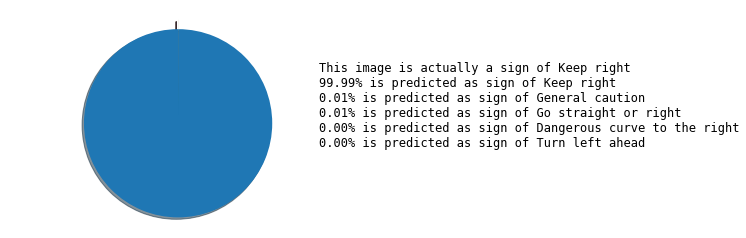

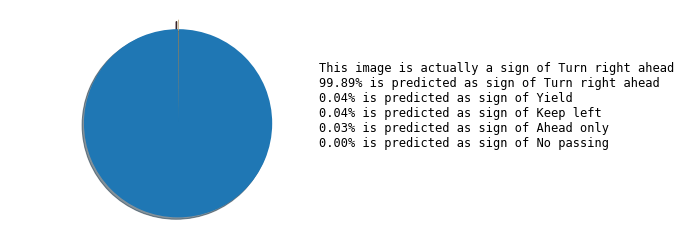

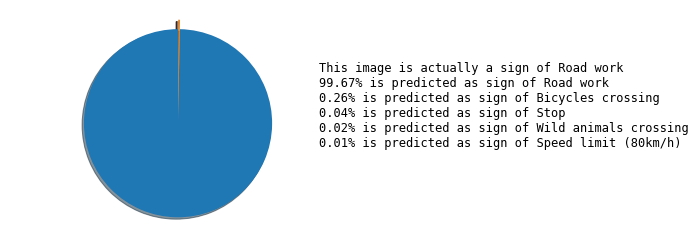

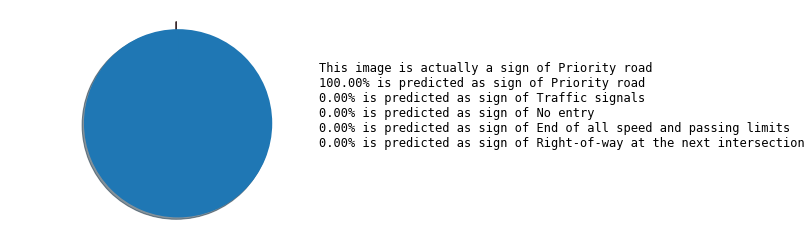

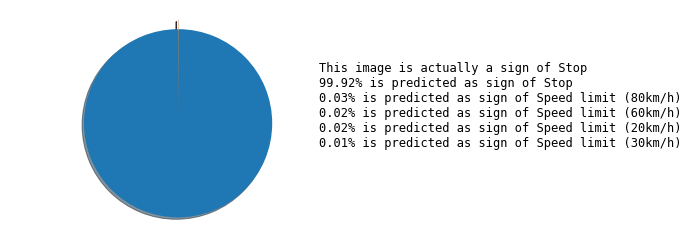

In [38]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    k = 5
    top5_possibility, top5_indices = sess.run(tf.nn.top_k(tf.constant(p), k=k))
    for n in range(len(top5_possibility)):
        #print('\nThis image is actually a sign of %s'%traffic_sign_names[y_newTest[n]])
        labels = []
        sizes = []
        explode = (0.1, 0, 0, 0, 0)
        annotation = 'This image is actually a sign of %s\n'%traffic_sign_names[y_newTest[n]]
        for rank in range(k):
            #print('%2.2f%% is predicted as sign of %s'%(top5_possibility[n][rank]*100, traffic_sign_names[top5_indices[n][rank]]))
            labels.append(traffic_sign_names[top5_indices[n][rank]])
            sizes.append(top5_possibility[n][rank]*100)
            annotation +='%2.2f%% is predicted as sign of %s\n'%(top5_possibility[n][rank]*100, traffic_sign_names[top5_indices[n][rank]])
        
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=None, autopct=None, shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.annotate(annotation,xy=(0,0), xytext=(1.5,-0.5), fontsize=12, family='monospace')
        plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [2]:
from IPython.display import display, Markdown

with open('writeup.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))


# Build a Traffic Sign Recognition Project

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/barchart_training.png "Visualization_training"
[image2]: ./examples/barchart_validation.png "Visualization_valid"
[image3]: ./examples/barchart_test.png "Visualization_test"
[image4]: ./examples/normalized.png "normalized"
[image5]: ./examples/download_1_5.png "Traffic Sign 1_5"
[image6]: ./examples/download_6_10.png "Traffic Sign 6_10"
[image7]: ./examples/download_new.png "Traffic Sign new"
[image13]: ./examples/download_new2.png "Traffic Sign new 2"
[image8]: ./examples/demo1.png "possibility_1"
[image9]: ./examples/demo2.png "possibility_2"
[image10]: ./examples/demo3.png "possibility_3"
[image11]: ./examples/demo4.png "possibility_4"
[image12]: ./examples/demo5.png "possibility_5"

---
### Writeup

You're reading it! and here is a link to my [project code](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the python built-in function to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the training data distributes.

![alt text][image1]

The following are two bar chart showing the distribution status of the validation and test data respectively.

![alt text][image2]
![alt text][image3]

From the above tree bar charts presented, I could have the conclution that the tree datasets have the similar sample distribution.

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to keep the images as RGB ones because I believed that different color channels might bring more information into this model. The first exploration was that I trained the LeNet-5 model shown in the classroom with the training data. The trainging accuracy was poor and that was showing the model was a little bit underfitting. My strategy was to adjust the model architecture.

As the next step, I normalized the image data because I found that the pixel intensity differs much between samples. The normalization method was to map pixel data in the repective RGB channel to values between -1 to 1. Since such transformation would let the image unable to displayed, it needed to transform the normalized image back to RGB data type just in order to compare the difference before and after the normalization.

![alt text][image4]

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         	|     Description	        		| 
|:---------------------:|:---------------------------------------------:| 
| Input         	| 32x32x3 RGB image   				| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x18 	|
| Sigmoid		| 						|
| Max pooling	      	| 2x2 stride,  outputs 14x14x64 		|
| Convolution 5x5	| 1x1 stride, valid padding, outputs 10x10x48   |
| Sigmoid		| 						|
| Max pooling	      	| 2x2 stride,  outputs 5x5x48 		        |
| Flatten               | outputs 1200                                  |
| Fully connected	| input 1200, output 360        		|
| Sigmoid		| 						|
| Fully connected	| input 360, output 252        		        |
| Sigmoid		| 						|
| Fully connected	| input 252, output 43        		        |
| Softmax		|         					|
|						|												|
|						|												|
 
I tripled the capacity of the original LeNet-5 model, so that the model could learn features provided via different channels.

#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used the Adam optimizer provided in Tensorflow. The batch size was set as 128 and the learning rate was 0.001.
As per epochs setting, at first it was set as 10. But the validation accuracy seemed still climbing.
Then it was set as 20 to make sure that the validation accuracy stayed at the peak but not yet started to descend conversely.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of 1.0
* validation set accuracy of 0.968 
* test set accuracy of 0.950
 
The first architecture that was tried was the original LeNet-5 model shown in the class room. The reason was that its input, output and application was similar to this project, and it was quite easy on the hands.

However, the validation accuracy was poor, and I was wondering whether the model's capacity was not enough. Perhaps its original input was grayscale images, but I choosed to keep the RGB channels.

Therefore the capacity of each layer was tripled. Meanwhile, since all the image data were normalized to the values between -1 to 1, the activating function was replaced with sigmoid function. After such adjusting on the original LeNet-5 model, both training accuracy and validation accuracy were improved significantly.

But the next question was that whether the model was overfitting. I explored different setting for epochs, from 10 to 30, and found that after 15 epochs the trainging accuracy has reached 1.00, but the validation accuracy was still climbing slowly until 20 epochs. Till 30 epochs, the validation accuracy always stayed around the same value, and did not start to descend. No sign of overfitting was shown and the 20 epochs was choosed for the training.

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are ten German traffic signs that I found on the web:

![alt text][image5] 
![alt text][image6]

The second image might be difficult to classify because the image was not scaled down in proportion. The traffic sign has become oval in shape. Similar distortion was also found on the third, the fifth and the tenth image repectively. 

The sixth image might also be difficult to classify. It was shotted at a different viewing angle from others.  

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Right-of-way at the next intersection      		| Right-of-way at the next intersection  	| 
| Roundabout mandatory     			| Roundabout mandatory					|
| Yield						| No passing for vehicles over 3.5 metric tons		|
| Keep right	      		| Keep right					 			|
| Speed limit (60km/h)		| No passing      							|
| Road narrows on the right	| Speed limit (20km/h)      						|
| Priority road			| Priority road      							|
| Turn right ahead		| Yield      								|
| Road work			| Road work      							|
| Stop				| Priority road      							|

The model was able to correctly guess 5 of the 10 traffic signs, which gives an accuracy of 50%.

Such result was quite different from the test data accuracy. The possible reasons might be as the following.

First, the image distortion caused by the scaling. For example, the yield sign image was of 273x185 pixels, instead of 1:1 aspect ratio, and some distortion might be generated while it must be downscaled to 32x32 pixels.

Second, the comparably low amounts of samples in training data. According to the analysis on sign distribution of training data, sign of "road narrows on the right" and "turn right ahead" had much fewer samples. Ths situation might let the model learn less features on these kind of signs, and therefore the model would be unable to classify correctly while facing slightly distorted images.

Furthermore, in order to verify my inference, I clipped all the images to nearly 1:1 aspect ratio. And then the model classified them again. The clipped images are shown below.

![alt text][image7]
![alt text][image13]

This time, except the sign of "Road narrows on the right", all the originally wrong prediction became correct. The Model had 90.0% prediction accuracy on these ten newly clipped images.

Comapred to the 95.0% accuracy on test data set, this result was considerably consistent.
 
#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

For the first image, the model is almost very sure that this is a Right-of-way at the next intersection sign (probability of 0.99), and the image does contain a Right-of-way at the next intersection sign. The top five soft max probabilities were shown as below.

![alt text][image8]

For the second to fifth image, the probability is shown as below.

![alt text][image9]
![alt text][image10]
![alt text][image11]
![alt text][image12]





> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")